In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



In [2]:
data=pd.read_csv('voice.csv')

In [3]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [5]:
data.shape

(3168, 21)

In [6]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

In [7]:
dict(enumerate(label_encoder.classes_))


{0: 'female', 1: 'male'}

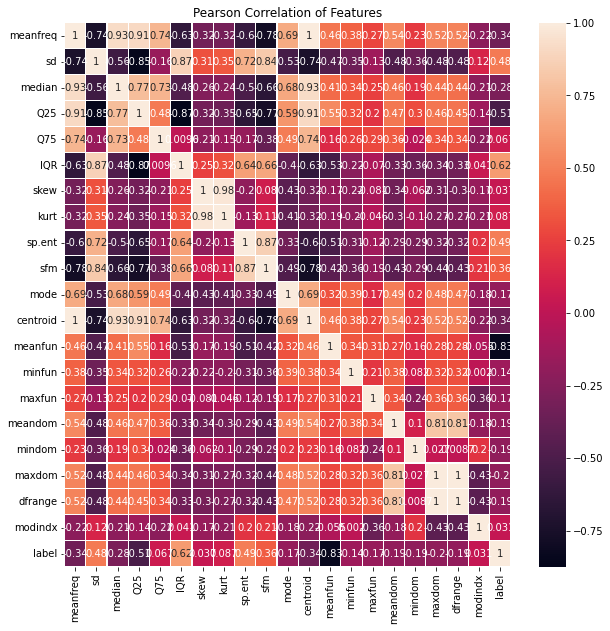

In [8]:
import seaborn as sns
data.corr()
colormap = plt.cm.RdBu
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features')
sns.heatmap( data.corr(),linewidths=0.1,vmax=1.0,annot=True)

In [9]:
y = data['label'].copy()
X = data.drop('label', axis=1).copy()

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)

In [12]:
X.shape

(3168, 20)

In [13]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
48/48 [==============================] - 1s 10ms/step - loss: 0.4534 - accuracy: 0.7993 - auc: 0.9063 - val_loss: 0.2642 - val_accuracy: 0.9237 - val_auc: 0.9860
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 0.1896 - accuracy: 0.9480 - auc: 0.9886 - val_loss: 0.1112 - val_accuracy: 0.9632 - val_auc: 0.9960
Epoch 3/100
48/48 [==============================] - 0s 4ms/step - loss: 0.1014 - accuracy: 0.9651 - auc: 0.9950 - val_loss: 0.0769 - val_accuracy: 0.9789 - val_auc: 0.9965
Epoch 4/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0781 - accuracy: 0.9730 - auc: 0.9964 - val_loss: 0.0686 - val_accuracy: 0.9816 - val_auc: 0.9966
Epoch 5/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0689 - accuracy: 0.9757 - auc: 0.9967 - val_loss: 0.0597 - val_accuracy: 0.9816 - val_auc: 0.9970
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.0614 - accuracy: 0.9796 - auc: 0.9973 - val_loss: 0.0588 - 

In [15]:

model.summary()
print(len(model.layers))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________
4


In [16]:
print(model.evaluate(X_test,y_test))
pred=model.predict(X_test)
print( tf.math.confusion_matrix(y_test,pred))


40/40 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9787 - auc: 0.9955
[0.07465564459562302, 0.9787065982818604, 0.9955065846443176]
40/40 [==============================] - 0s 2ms/step
tf.Tensor(
[[612   0]
 [656   0]], shape=(2, 2), dtype=int32)


In [17]:
"""#import librosa
audio_data = '/content/fi.wav'
x , sr = librosa.load(audio_data)
import IPython.display as ipd
ipd.Audio(audio_data)
#pred=model.predict(sr)
#pred=model.predict(x)"""

"#import librosa\naudio_data = '/content/fi.wav'\nx , sr = librosa.load(audio_data)\nimport IPython.display as ipd\nipd.Audio(audio_data)\n#pred=model.predict(sr)\n#pred=model.predict(x)"

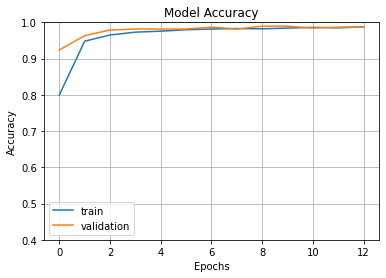

In [18]:
fig=plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

In [19]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, dtype=np.float, maxlen=25, padding='post')
X = X.reshape(-1, 5, 5)
X = np.expand_dims(X, axis=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


In [21]:
inputs = tf.keras.Input(shape=(X.shape[1],X.shape[2],X.shape[3]))
x = tf.keras.layers.Conv2D(16, 2, activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(32, 1, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

In [22]:
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 5, 1)]         0         
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 16)          80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 32)          544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0   

In [23]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=25,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/25
56/56 [==============================] - 1s 10ms/step - loss: 0.6674 - accuracy: 0.5646 - auc: 0.6489 - val_loss: 0.6229 - val_accuracy: 0.6802 - val_auc: 0.7798
Epoch 2/25
56/56 [==============================] - 0s 4ms/step - loss: 0.5698 - accuracy: 0.7265 - auc: 0.8212 - val_loss: 0.5032 - val_accuracy: 0.7883 - val_auc: 0.8766
Epoch 3/25
56/56 [==============================] - 0s 5ms/step - loss: 0.4405 - accuracy: 0.8404 - auc: 0.9099 - val_loss: 0.3786 - val_accuracy: 0.8649 - val_auc: 0.9408
Epoch 4/25
56/56 [==============================] - 0s 5ms/step - loss: 0.3292 - accuracy: 0.8917 - auc: 0.9497 - val_loss: 0.3016 - val_accuracy: 0.8941 - val_auc: 0.9533
Epoch 5/25
56/56 [==============================] - 0s 5ms/step - loss: 0.2625 - accuracy: 0.9052 - auc: 0.9642 - val_loss: 0.2531 - val_accuracy: 0.9077 - val_auc: 0.9655
Epoch 6/25
56/56 [==============================] - 0s 4ms/step - loss: 0.2208 - accuracy: 0.9216 - auc: 0.9733 - val_loss: 0.2136 - val_ac

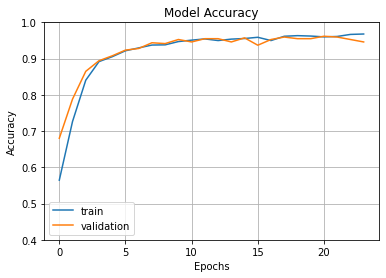

In [24]:
fig=plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

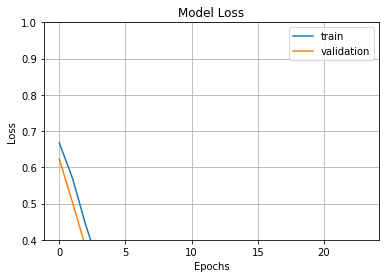

In [25]:
fig=plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

In [29]:
print(model.evaluate(X_test,y_test))
pred=model.predict(X_test)
print( tf.math.confusion_matrix(y_test,pred))

30/30 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.9485 - auc: 0.9885
[0.13465146720409393, 0.9484753012657166, 0.9884526133537292]
30/30 [==============================] - 0s 2ms/step
tf.Tensor(
[[452   0]
 [499   0]], shape=(2, 2), dtype=int32)


In [27]:
"""print(pred)
output_class=y[np.argmax(pred)]
if(output_class==1):
  print("Gender is Male")
else:
  print("Gender is : Female")"""


'print(pred)\noutput_class=y[np.argmax(pred)]\nif(output_class==1):\n  print("Gender is Male")\nelse:\n  print("Gender is : Female")'

In [28]:
"""import pyaudio
import speech_recognition as sr
r=sr.Recognizer()
with sr.Microphone() as source:
  print('Please speak')
  audio=r.listen(source)
  try:
    text=r.recognize_google(audio)
    print('{}'.format(text))
  except:
    print('Please speak again')"""




ModuleNotFoundError: ignored

In [ ]:
from io import BytesIO
import codecs  
from base64 import b64decode
from google.colab import output
from IPython.display import Javascript
RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""
def record(sec=7):
  print("Speak Now...")
  display(Javascript(RECORD))
  sec += 1
  s = output.eval_js('record(%d)' % (sec*1000))
  print("Done Recording !")
  b = b64decode(s.split(',')[1])
  return b #byte stream
text=record()
print(text)


In [ ]:
import pickle
filename='gender_classification'
pickle.dump(model,open(filename,'wb'))